In [3]:
# Loading and Exploring the dataset
import pandas as pd

In [6]:
# Loading the dataset
file_path = "Sample_Pharmaceutical_Drug_Sales.csv"
df = pd.read_csv(file_path)

In [7]:
# Displaying the basic info.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Drug Name             1000 non-null   object
 1   Manufacturer          1000 non-null   object
 2   Dosage Form           1000 non-null   object
 3   Strength              1000 non-null   object
 4   Package Size          1000 non-null   object
 5   Units Sold            1000 non-null   int64 
 6   Revenue               1000 non-null   object
 7   Sale Date             1000 non-null   object
 8   Region                1000 non-null   object
 9   Sales Representative  1000 non-null   object
 10  Customer Type         1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


,Drug Name,Manufacturer,Dosage Form,Strength,Package Size,Units Sold,Revenue,Sale Date,Region,Sales Representative,Customer Type
0,Drug B,Company W,Tablet,100 mg/ml,50 g,1500,$43833,2024-02-07,South America,Susan Hernandez,Clinics
1,Drug B,Company X,Cream,500 mg,100 ml,1194,$48717,2023-08-08,South America,Jackie Wagner,Clinics
2,Drug E,Company X,Capsule,50 mg,60,618,$8744,2024-06-15,Africa,Mariah Mccoy,Hospitals
3,Drug E,Company X,Injection,10 mg,100 ml,1455,$25321,2024-07-15,Asia,Courtney Doyle,Pharmacy
4,Drug C,Company V,Tablet,100 mg/ml,50 g,130,$13669,2023-08-13,South America,Dawn Torres,Clinics


In [10]:
# Transforming Phase (Data Cleaning & Processing)

# Re-naming the columns (lowercase and replace spaces)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Converting the 'sale_date' to datetime
df["sale_date"] = pd.to_datetime(df["sale_date"])

# Extract year from sale_date
df["year"] = df["sale_date"].dt.year

# Removing the "$" sign from 'revenue' and converting it to a float
df['revenue'] = df['revenue'].replace(r'[\$,]', '', regex=True).astype(float)

# Verify the transformations were a success
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   drug_name             1000 non-null   object        
 1   manufacturer          1000 non-null   object        
 2   dosage_form           1000 non-null   object        
 3   strength              1000 non-null   object        
 4   package_size          1000 non-null   object        
 5   units_sold            1000 non-null   int64         
 6   revenue               1000 non-null   float64       
 7   sale_date             1000 non-null   datetime64[ns]
 8   region                1000 non-null   object        
 9   sales_representative  1000 non-null   object        
 10  customer_type         1000 non-null   object        
 11  year                  1000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(8)
memory usage:

,drug_name,manufacturer,dosage_form,strength,package_size,units_sold,revenue,sale_date,region,sales_representative,customer_type,year
0,Drug B,Company W,Tablet,100 mg/ml,50 g,1500,43833.0,2024-02-07,South America,Susan Hernandez,Clinics,2024
1,Drug B,Company X,Cream,500 mg,100 ml,1194,48717.0,2023-08-08,South America,Jackie Wagner,Clinics,2023
2,Drug E,Company X,Capsule,50 mg,60,618,8744.0,2024-06-15,Africa,Mariah Mccoy,Hospitals,2024
3,Drug E,Company X,Injection,10 mg,100 ml,1455,25321.0,2024-07-15,Asia,Courtney Doyle,Pharmacy,2024
4,Drug C,Company V,Tablet,100 mg/ml,50 g,130,13669.0,2023-08-13,South America,Dawn Torres,Clinics,2023


In [11]:
# Load Phase
import sqlite3

In [13]:
# Connect to SQLite (or create database)
conn = sqlite3.connect("pharma_sales.db")  # Use local path
cursor = conn.cursor()

# Save transformed dataframe to database
df.to_sql("pharma_sales", conn, if_exists="replace", index=False)

# Verify by reading back data
query = "SELECT * FROM pharma_sales LIMIT 5"
pd.read_sql(query, conn)

,drug_name,manufacturer,dosage_form,strength,package_size,units_sold,revenue,sale_date,region,sales_representative,customer_type,year
0,Drug B,Company W,Tablet,100 mg/ml,50 g,1500,43833.0,2024-02-07 00:00:00,South America,Susan Hernandez,Clinics,2024
1,Drug B,Company X,Cream,500 mg,100 ml,1194,48717.0,2023-08-08 00:00:00,South America,Jackie Wagner,Clinics,2023
2,Drug E,Company X,Capsule,50 mg,60,618,8744.0,2024-06-15 00:00:00,Africa,Mariah Mccoy,Hospitals,2024
3,Drug E,Company X,Injection,10 mg,100 ml,1455,25321.0,2024-07-15 00:00:00,Asia,Courtney Doyle,Pharmacy,2024
4,Drug C,Company V,Tablet,100 mg/ml,50 g,130,13669.0,2023-08-13 00:00:00,South America,Dawn Torres,Clinics,2023


In [14]:
# Query: Calculating the total revenue per year 
query = "SELECT year, SUM(revenue) as total_revenue FROM pharma_sales Group BY year"
revenue_df = pd.read_sql(query, conn)

# Display revenue per year
revenue_df

,year,total_revenue
0,2023,11659482.0
1,2024,14419322.0


In [16]:
import matplotlib.pyplot as plt

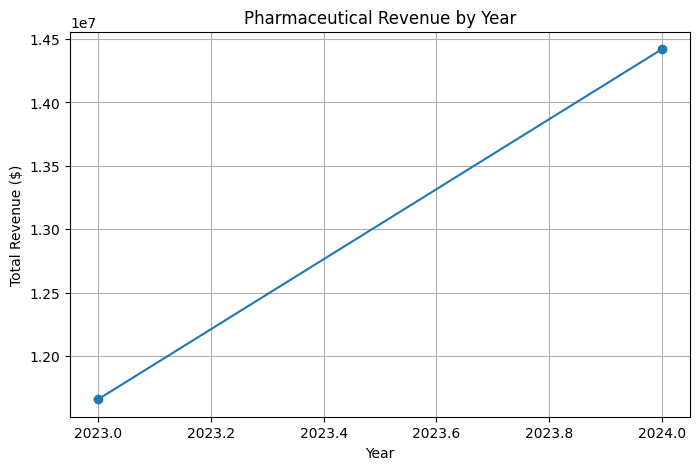

In [17]:
# Revenue Trends Over Time

# Plot total revenue per year
plt.figure(figsize=(8,5))
plt.plot(revenue_df["year"], revenue_df["total_revenue"], marker='o', linestyle='-')

# Label axes and add title
plt.xlabel("Year")
plt.ylabel("Total Revenue ($)")
plt.title("Pharmaceutical Revenue by Year")
plt.grid(True)

# Show the plot
plt.show()